# NASA API meteorites analysis

![](https://scitechdaily.com/images/Sugar-Delivered-to-Earth-From-Space.jpg)

For this analysis we used NASA API data that cover all meteorites that have ever fallen on the Earth.

Team:
- Lenka Krenkova
- Tasbir Singh

Data available [here](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh).

# Loading data

In [1]:
import requests
import json
import pandas as pd
import datetime

In [2]:
meteor = requests.get('https://data.nasa.gov/resource/gh4g-9sfh.json')
meteor

<Response [200]>

In [91]:
meteor.text[:500]

'[{"name":"Aachen","id":"1","nametype":"Valid","recclass":"L5","mass":"21","fall":"Fell","year":"1880-01-01T00:00:00.000","reclat":"50.775000","reclong":"6.083330","geolocation":{"latitude":"50.775","longitude":"6.08333"}}\n,{"name":"Aarhus","id":"2","nametype":"Valid","recclass":"H6","mass":"720","fall":"Fell","year":"1951-01-01T00:00:00.000","reclat":"56.183330","reclong":"10.233330","geolocation":{"latitude":"56.18333","longitude":"10.23333"}}\n,{"name":"Abee","id":"6","nametype":"Valid","reccla'

In [4]:
meteor.headers

{'Date': 'Wed, 08 Jul 2020 07:05:48 GMT', 'Server': 'nginx', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload, max-age=31536000; includeSubDomains', 'X-Frame-Options': 'DENY', 'Content-Type': 'application/json;charset=utf-8', 'Access-Control-Allow-Origin': '*', 'ETag': '"YWxwaGEuNzQxODNfMV8zMEFYZHZIaXM1MmdYNUtUWnhKOXludlA3Y3VnUQ---gziidiVKaJjekP2HUnJcReJdWmh-Jc--gzip--gzip"', 'X-SODA2-Fields': '["name","id","nametype","recclass","mass","fall","year","reclat","reclong","geolocation",":@computed_region_cbhk_fwbd",":@computed_region_nnqa_25f4"]', 'X-SODA2-Types': '["text","text","text","text","number","text","floating_timestamp","text","text","location","number","number"]', 'X-SODA2-Data-Out-Of-Date': 'false', 'X-SODA2-Truth-Last-Modified': 'Thu, 06 Sep 2018 10:53:59 GMT', 'X-SODA2-Secondary-Last-Modified': 'Thu, 06 Sep 2018 10:53:59 GMT', 'Last-Modified': 'Thu, 06 Sep 2018 10:53:59 GMT', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Age': '2', 'X-Socra

In [5]:
meteor.headers['content-type']

'application/json;charset=utf-8'

In [6]:
meteor.encoding

'utf-8'

In [7]:
meteor_data = meteor.content.decode('utf-8')
df = pd.read_json(meteor_data)
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'latitude': '50.775', 'longitude': '6.08333'}",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'latitude': '56.18333', 'longitude': '10.23333'}",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'latitude': '54.21667', 'longitude': '-113.0'}",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'latitude': '16.88333', 'longitude': '-99.9'}",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'latitude': '-33.16667', 'longitude': '-64.95'}",NaN,NaN


# Data description

The dataset contains the following variables:
name: the name of the meteorite (typically a location, often modified with a number, year, composition, etc)
id: a unique identifier for the meteorite
nametype: one of:
- valid: a typical meteorite
- relict: a meteorite that has been highly degraded by weather on Earth
- recclass: the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics (see the Wikipedia article on meteorite classification for a primer)
- mass: the mass of the meteorite, in grams
- fall: whether the meteorite was seen falling, or was discovered after its impact; one of:
    - Fell: the meteorite's fall was observed
    - Found: the meteorite's fall was not observed
- year: the year the meteorite fell, or the year it was found (depending on the value of fell)
- reclat: the latitude of the meteorite's landing
- reclong: the longitude of the meteorite's landing
- GeoLocation: a parentheses-enclose, comma-separated tuple that combines reclat and reclong

In [8]:
df.describe()

,id,mass,reclat,reclong,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
count,1000.00000,9.720000e+02,988.000000,988.000000,133.000000,134.000000
mean,15398.72800,5.019020e+04,29.691592,19.151208,26.939850,1537.888060
std,10368.70402,7.539857e+05,23.204399,68.644015,12.706929,899.826915
min,1.00000,1.500000e-01,-44.116670,-157.866670,1.000000,10.000000
25%,7770.50000,6.795000e+02,21.300000,-5.195832,17.000000,650.250000
50%,12757.50000,2.870000e+03,35.916665,17.325000,24.000000,1647.000000
75%,18831.25000,1.005000e+04,45.817835,76.004167,37.000000,2234.250000
max,57168.00000,2.300000e+07,66.348330,174.400000,50.000000,3190.000000


In [9]:
df.dtypes

name                            object
id                               int64
nametype                        object
recclass                        object
mass                           float64
fall                            object
year                            object
reclat                         float64
reclong                        float64
geolocation                     object
:@computed_region_cbhk_fwbd    float64
:@computed_region_nnqa_25f4    float64
dtype: object

In [10]:
df.isnull().sum()

name                             0
id                               0
nametype                         0
recclass                         0
mass                            28
fall                             0
year                             1
reclat                          12
reclong                         12
geolocation                     12
:@computed_region_cbhk_fwbd    867
:@computed_region_nnqa_25f4    866
dtype: int64

# Data cleaning

## Dropping columns with majority of NaN values

In [11]:
df = df.drop(columns=[':@computed_region_cbhk_fwbd', ':@computed_region_nnqa_25f4'])

## Converting to datetime

If we want to work with date in the dataset, we need to convert the object column into datetime. As our dataset has the earliest year around 861, we face problems with converting to datetime (it only operates with year values after 1677). Therefore we had to figure out different way to convert our years. We used slicing (as every date is on 1st of January, we only need the year) and for loop with datetime.strptime.

In [12]:
#creating new column with only years
df['year_sliced'] = df['year'].str.slice(0,4,1)
df.year_sliced.tail()

995    1934
996    2011
997    1869
998    1922
999    1905
Name: year_sliced, dtype: object

In [13]:
df.loc[df['year'].isnull()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,year_sliced
37,Northwest Africa 5815,50693,Valid,L5,256.8,Found,NaN,0.0,0.0,"{'latitude': '0.0', 'longitude': '0.0'}",NaN


In [14]:
#dropping the NaN value in the year
df = df.dropna(subset=['year'])

In [15]:
#to make sure it is object/string type
df['year_sliced'] = df['year_sliced'].astype('str')

In [16]:
#looping through sliced years
years_datetime = []
for i in df['year_sliced']:
    date = datetime.datetime.strptime(i,'%Y')
    year = date.year
    years_datetime.append(year)
    
years_datetime[:5]

[1880, 1951, 1952, 1976, 1902]

In [17]:
len(years_datetime)

999

In [18]:
#setting year as the converted year
df['year'] = years_datetime
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,year_sliced
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"{'latitude': '50.775', 'longitude': '6.08333'}",1880
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"{'latitude': '56.18333', 'longitude': '10.23333'}",1951
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"{'latitude': '54.21667', 'longitude': '-113.0'}",1952
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"{'latitude': '16.88333', 'longitude': '-99.9'}",1976
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"{'latitude': '-33.16667', 'longitude': '-64.95'}",1902


In [19]:
df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year             int64
reclat         float64
reclong        float64
geolocation     object
year_sliced     object
dtype: object

## Dealing with missung values

In [20]:
df.isnull().sum()

name            0
id              0
nametype        0
recclass        0
mass           28
fall            0
year            0
reclat         12
reclong        12
geolocation    12
year_sliced     0
dtype: int64

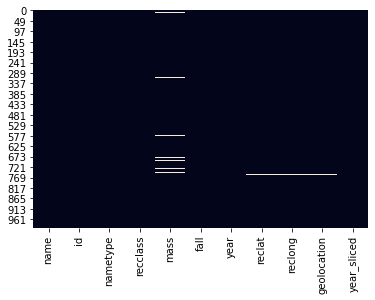

In [21]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

We have a couple of missing values in a mass column. We can try to imput some values based on the class where the meteorite belongs.

### Imputing NaN values in mass according to class

In [22]:
df.loc[df['mass'].isnull()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,year_sliced
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769,50.66667,2.33333,"{'latitude': '50.66667', 'longitude': '2.33333'}",1769
38,Angers,2301,Valid,L6,NaN,Fell,1822,47.46667,-0.55000,"{'latitude': '47.46667', 'longitude': '-0.55'}",1822
76,Barcelona (stone),4944,Valid,OC,NaN,Fell,1704,41.36667,2.16667,"{'latitude': '41.36667', 'longitude': '2.16667'}",1704
93,Belville,5009,Valid,OC,NaN,Fell,1937,-32.33333,-64.86667,"{'latitude': '-32.33333', 'longitude': '-64.86...",1937
172,Castel Berardenga,5292,Valid,Stone-uncl,NaN,Fell,1791,43.35000,11.50000,"{'latitude': '43.35', 'longitude': '11.5'}",1791
204,Chitado,5356,Valid,L6,NaN,Fell,1966,-17.35000,13.96667,"{'latitude': '-17.35', 'longitude': '13.96667'}",1966
262,Dunhua,7749,Valid,Stone-uncl,NaN,Fell,1976,43.33333,128.25000,"{'latitude': '43.33333', 'longitude': '128.25'}",1976
308,Fort Flatters,10166,Valid,Stone-uncl,NaN,Fell,1944,28.25000,7.00000,"{'latitude': '28.25', 'longitude': '7.0'}",1944
312,Fünen,10838,Valid,Stone-uncl,NaN,Fell,1654,55.33333,10.33333,"{'latitude': '55.33333', 'longitude': '10.33333'}",1654
320,Gao-Guenie,10854,Valid,H5,NaN,Fell,1960,11.65000,-2.18333,"{'latitude': '11.65', 'longitude': '-2.18333'}",1960


Big portion of the missing mass data is from the Stone-uncl recclass. We will check how this class looks and then if the distribution within the class is not too uneven we can use the median to fill the missing values.

In [23]:
df[df['recclass'] == 'Stone-uncl'].describe()

,id,mass,year,reclat,reclong
count,34.000000,22.000000,34.000000,33.000000,33.000000
mean,15146.794118,5628.668182,1762.323529,35.241918,35.954041
std,6378.712465,8324.965585,205.262392,20.998680,47.127547
min,2294.000000,1.400000,921.000000,-23.383330,-8.000000
25%,10838.500000,709.000000,1648.750000,28.250000,7.000000
50%,16918.500000,2157.500000,1793.500000,43.333330,14.883330
75%,18895.500000,4500.000000,1903.250000,50.350000,38.416670
max,23732.000000,29000.000000,1977.000000,58.550000,150.516670


In [24]:
df.mass[(df['mass'].isnull())&(df['recclass']=='Stone-uncl')] = df[df['recclass'] == 'Stone-uncl'].mass.median()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df.loc[df['mass'].isnull()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,year_sliced
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769,50.66667,2.33333,"{'latitude': '50.66667', 'longitude': '2.33333'}",1769
38,Angers,2301,Valid,L6,NaN,Fell,1822,47.46667,-0.55000,"{'latitude': '47.46667', 'longitude': '-0.55'}",1822
76,Barcelona (stone),4944,Valid,OC,NaN,Fell,1704,41.36667,2.16667,"{'latitude': '41.36667', 'longitude': '2.16667'}",1704
93,Belville,5009,Valid,OC,NaN,Fell,1937,-32.33333,-64.86667,"{'latitude': '-32.33333', 'longitude': '-64.86...",1937
204,Chitado,5356,Valid,L6,NaN,Fell,1966,-17.35000,13.96667,"{'latitude': '-17.35', 'longitude': '13.96667'}",1966
320,Gao-Guenie,10854,Valid,H5,NaN,Fell,1960,11.65000,-2.18333,"{'latitude': '11.65', 'longitude': '-2.18333'}",1960
324,Gasseltepaoua,10866,Valid,H5,NaN,Fell,2000,14.15083,-2.04167,"{'latitude': '14.15083', 'longitude': '-2.04167'}",2000
346,Guangnan,11436,Valid,L6,NaN,Fell,1983,24.10000,105.00000,"{'latitude': '24.1', 'longitude': '105.0'}",1983
392,Ibrisim,11994,Valid,OC,NaN,Fell,1949,38.00000,35.00000,"{'latitude': '38.0', 'longitude': '35.0'}",1949
562,Lusaka,14759,Valid,Unknown,NaN,Fell,1951,-7.21667,29.43333,"{'latitude': '-7.21667', 'longitude': '29.43333'}",1951


In [26]:
df[df['recclass'] == 'OC'].describe()

,id,mass,year,reclat,reclong
count,21.000000,15.000000,21.000000,21.000000,21.000000
mean,13462.809524,1034.280000,1894.904762,33.935186,0.171428
std,6035.110344,1120.439005,66.974551,18.629298,80.410563
min,4944.000000,72.900000,1704.000000,-32.333330,-104.000000
25%,10088.000000,243.050000,1878.000000,31.250000,-81.416670
50%,12381.000000,845.200000,1910.000000,36.500000,20.333330
75%,17935.000000,1340.000000,1933.000000,43.838890,72.633330
max,23670.000000,4460.000000,1980.000000,56.800000,138.383330


In [27]:
df.mass[(df['mass'].isnull())&(df['recclass']=='OC')] = df[df['recclass'] == 'OC'].mass.median()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df.loc[df['mass'].isnull()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,year_sliced
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769,50.66667,2.33333,"{'latitude': '50.66667', 'longitude': '2.33333'}",1769
38,Angers,2301,Valid,L6,NaN,Fell,1822,47.46667,-0.55000,"{'latitude': '47.46667', 'longitude': '-0.55'}",1822
204,Chitado,5356,Valid,L6,NaN,Fell,1966,-17.35000,13.96667,"{'latitude': '-17.35', 'longitude': '13.96667'}",1966
320,Gao-Guenie,10854,Valid,H5,NaN,Fell,1960,11.65000,-2.18333,"{'latitude': '11.65', 'longitude': '-2.18333'}",1960
324,Gasseltepaoua,10866,Valid,H5,NaN,Fell,2000,14.15083,-2.04167,"{'latitude': '14.15083', 'longitude': '-2.04167'}",2000
346,Guangnan,11436,Valid,L6,NaN,Fell,1983,24.10000,105.00000,"{'latitude': '24.1', 'longitude': '105.0'}",1983
562,Lusaka,14759,Valid,Unknown,NaN,Fell,1951,-7.21667,29.43333,"{'latitude': '-7.21667', 'longitude': '29.43333'}",1951
578,Malotas,15397,Valid,H5,NaN,Fell,1931,-28.93333,-63.23333,"{'latitude': '-28.93333', 'longitude': '-63.23...",1931
645,Monze,16733,Valid,L6,NaN,Fell,1950,-15.96667,27.35000,"{'latitude': '-15.96667', 'longitude': '27.35'}",1950
775,Pê,18179,Valid,L6,NaN,Fell,1989,11.33367,-3.54217,"{'latitude': '11.33367', 'longitude': '-3.54217'}",1989


In [29]:
df[df['recclass'] == 'L6'].describe()

,id,mass,year,reclat,reclong
count,242.000000,237.000000,242.000000,239.000000,239.000000
mean,15519.747934,15944.514346,1911.628099,30.743728,16.776805
std,10495.262001,43550.928849,89.194843,23.304035,69.322905
min,370.000000,3.300000,861.000000,-40.975000,-122.969440
25%,10065.000000,668.000000,1877.250000,24.391665,-4.016665
50%,12762.000000,2800.000000,1920.000000,36.800000,14.850000
75%,18805.500000,9000.000000,1962.750000,46.525000,75.083330
max,57168.000000,303000.000000,2012.000000,61.650000,152.833330


In [30]:
df.mass[(df['mass'].isnull())&(df['recclass']=='L6')] = df[df['recclass'] == 'L6'].mass.median()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df.loc[df['mass'].isnull()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,year_sliced
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769,50.66667,2.33333,"{'latitude': '50.66667', 'longitude': '2.33333'}",1769
320,Gao-Guenie,10854,Valid,H5,NaN,Fell,1960,11.65000,-2.18333,"{'latitude': '11.65', 'longitude': '-2.18333'}",1960
324,Gasseltepaoua,10866,Valid,H5,NaN,Fell,2000,14.15083,-2.04167,"{'latitude': '14.15083', 'longitude': '-2.04167'}",2000
562,Lusaka,14759,Valid,Unknown,NaN,Fell,1951,-7.21667,29.43333,"{'latitude': '-7.21667', 'longitude': '29.43333'}",1951
578,Malotas,15397,Valid,H5,NaN,Fell,1931,-28.93333,-63.23333,"{'latitude': '-28.93333', 'longitude': '-63.23...",1931


In [32]:
df[df['recclass'] == 'H5'].describe()

,id,mass,year,reclat,reclong
count,143.000000,1.400000e+02,143.000000,143.000000,143.000000
mean,15862.538462,5.167957e+04,1919.209790,30.750138,14.490332
std,11007.237666,3.501677e+05,59.285517,22.780326,72.637132
min,392.000000,1.841000e+01,1753.000000,-37.333330,-157.783330
25%,10082.000000,7.665000e+02,1874.000000,23.433335,-24.000000
50%,12466.000000,2.748500e+03,1922.000000,36.041670,11.916670
75%,18872.500000,1.052500e+04,1970.000000,45.383330,77.416665
max,54719.000000,4.000000e+06,2010.000000,59.933330,139.956670


In [33]:
df.mass[(df['mass'].isnull())&(df['recclass']=='H5')] = df[df['recclass'] == 'H5'].mass.median()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df[df['recclass'] == 'Unknown'].describe()

,id,mass,year,reclat,reclong
count,2.000000,0.0,2.000000,2.000000,2.000000
mean,7592.000000,NaN,1860.000000,21.725000,15.883330
std,10135.668602,NaN,128.693434,40.929702,19.162594
min,425.000000,NaN,1769.000000,-7.216670,2.333330
25%,4008.500000,NaN,1814.500000,7.254165,9.108330
50%,7592.000000,NaN,1860.000000,21.725000,15.883330
75%,11175.500000,NaN,1905.500000,36.195835,22.658330
max,14759.000000,NaN,1951.000000,50.666670,29.433330


We cannot imput from Unknown class as there are many values missing. Therefore it is the best option to drop these values from our dataset.

### Dropping NaN values with Unknown class

In [35]:
#dropping NaN values from mass (remaining two values have class unknown)
df = df.dropna(subset=['mass'])

In [36]:
df.isnull().sum()

name            0
id              0
nametype        0
recclass        0
mass            0
fall            0
year            0
reclat         12
reclong        12
geolocation    12
year_sliced     0
dtype: int64

### Dropping NaN values from latitudes

There's no good way to import the missing latitudes and longituted, thus we will drop these values.

In [37]:
df = df.dropna(subset=['reclat'])

In [38]:
df.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
geolocation    0
year_sliced    0
dtype: int64

## Converting mass column to kg

The mass column is in grams, so we will convert these values to kg for better readability.

In [39]:
# transforming mass from g to kg
df['mass'] = df['mass']/1000
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,year_sliced
0,Aachen,1,Valid,L5,0.021,Fell,1880,50.77500,6.08333,"{'latitude': '50.775', 'longitude': '6.08333'}",1880
1,Aarhus,2,Valid,H6,0.720,Fell,1951,56.18333,10.23333,"{'latitude': '56.18333', 'longitude': '10.23333'}",1951
2,Abee,6,Valid,EH4,107.000,Fell,1952,54.21667,-113.00000,"{'latitude': '54.21667', 'longitude': '-113.0'}",1952
3,Acapulco,10,Valid,Acapulcoite,1.914,Fell,1976,16.88333,-99.90000,"{'latitude': '16.88333', 'longitude': '-99.9'}",1976
4,Achiras,370,Valid,L6,0.780,Fell,1902,-33.16667,-64.95000,"{'latitude': '-33.16667', 'longitude': '-64.95'}",1902


## Dropping columns with duplicate information

In [40]:
df.drop(columns=['year_sliced','geolocation'],inplace=True)

In [41]:
#look at the final dataset
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong
0,Aachen,1,Valid,L5,0.021,Fell,1880,50.77500,6.08333
1,Aarhus,2,Valid,H6,0.720,Fell,1951,56.18333,10.23333
2,Abee,6,Valid,EH4,107.000,Fell,1952,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1.914,Fell,1976,16.88333,-99.90000
4,Achiras,370,Valid,L6,0.780,Fell,1902,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,0.230,Fell,1934,13.63333,79.41667
996,Tissint,54823,Valid,Martian (shergottite),7.000,Fell,2011,29.48195,-7.61123
997,Tjabe,24011,Valid,H6,20.000,Fell,1869,-7.08333,111.53333
998,Tjerebon,24012,Valid,L5,16.500,Fell,1922,-6.66667,106.58333


# Visualizations

In [42]:
import descartes
import geopandas
from shapely.geometry import point
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import plotly.express as px
import seaborn as sns
import folium
import geoplot as gplt

In [43]:
#to display plots also on github
import plotly.io as pio

pio.renderers.default = "svg"

## Meteorite discoveries per year 

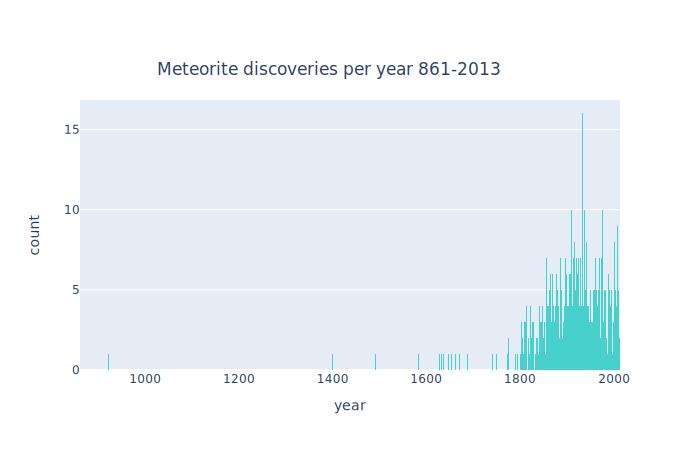

In [88]:
fig = px.histogram(df, x='year', nbins=2000, title='Meteorite discoveries per year 861-2013',
                  color_discrete_sequence=['mediumturquoise'])

fig.update_layout(
    title={
        'text': "Meteorite discoveries per year 861-2013",
        'y':0.86,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

### ..and decade

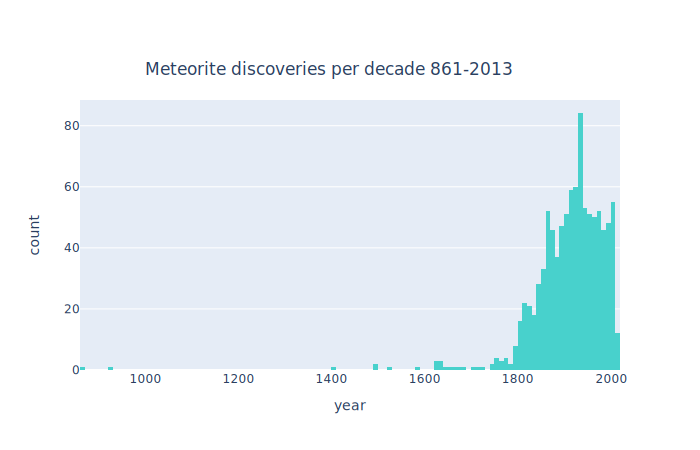

In [45]:
fig = px.histogram(df, x='year', nbins=200, title='Meteorite discoveries per decade 861-2013',
                  color_discrete_sequence=['mediumturquoise'])

fig.update_layout(
    title={
        'text': "Meteorite discoveries per decade 861-2013",
        'y':0.86,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

### Number of meteorites found each year

In [46]:
year_val = df.year.value_counts()
df_year = year_val.to_frame()
df_year = df_year.reset_index()
df_year = df_year.rename(columns={'index': 'Year', 'year': 'Value count'})
df_year

,Year,Value count
0,1933,16
1,1949,12
2,1868,11
3,1930,11
4,1976,10
...,...,...
241,1791,1
242,1790,1
243,1787,1
244,1785,1


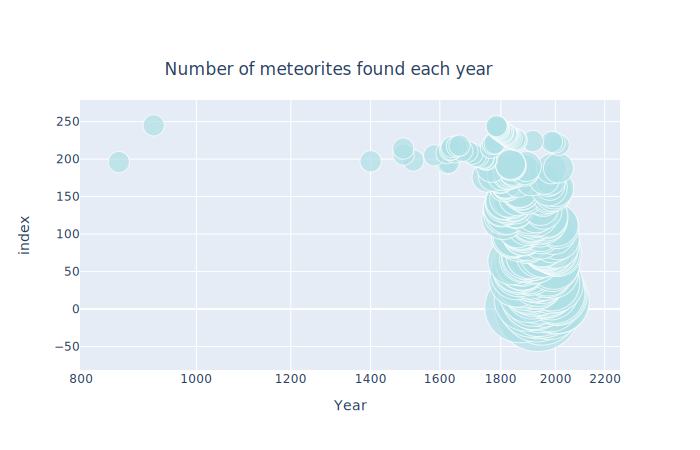

In [47]:
fig = px.scatter(df_year, x="Year", size="Value count", color_discrete_sequence=['powderblue'],
                 title='Number of meteorites found each year',
                 hover_name="Value count", log_x=True, size_max=60)


fig.update_layout(title={
        'text': "Number of meteorites found each year",
        'y':0.86,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

## Classes of meteorites

In [48]:
rec_class = df['recclass'].value_counts()
rec_class

L6                    239
H5                    143
H6                     77
L5                     68
H4                     48
                     ... 
H3.4                    1
Martian (nakhlite)      1
H3.7                    1
Iron, IIE               1
R3.8-6                  1
Name: recclass, Length: 116, dtype: int64

In [49]:
df_classes = rec_class.to_frame()
df_classes = df_classes.reset_index()
df_classes = df_classes.rename(columns={'index': 'Class', 'recclass': 'Value count'})
df_classes

,Class,Value count
0,L6,239
1,H5,143
2,H6,77
3,L5,68
4,H4,48
...,...,...
111,H3.4,1
112,Martian (nakhlite),1
113,H3.7,1
114,"Iron, IIE",1


In [50]:
df_classes.loc[df_classes['Value count'] < 15.0, 'Class'] = 'Other classes' # Represent only large classes
df_classes

,Class,Value count
0,L6,239
1,H5,143
2,H6,77
3,L5,68
4,H4,48
...,...,...
111,Other classes,1
112,Other classes,1
113,Other classes,1
114,Other classes,1


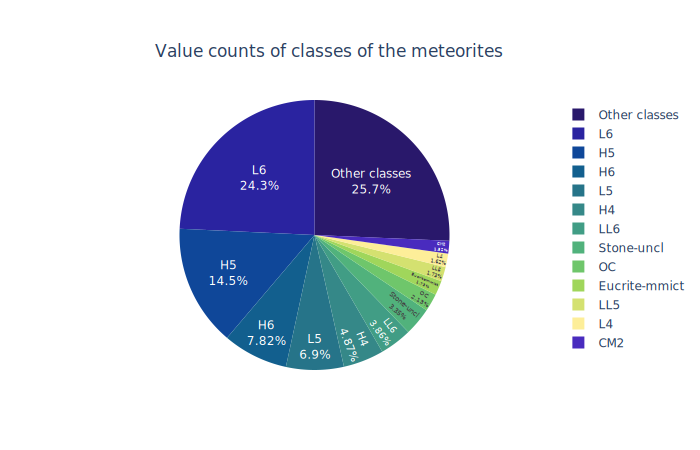

In [51]:
fig = px.pie(df_classes, values='Value count', names='Class',
             color_discrete_sequence=px.colors.sequential.haline,
            title='Value counts of classes of the meteorites')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title={
        'text': "Value counts of classes of the meteorites",
        'y':0.9,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

## Size of fallen meteorites

### Distribution of mass of fallen meteorites

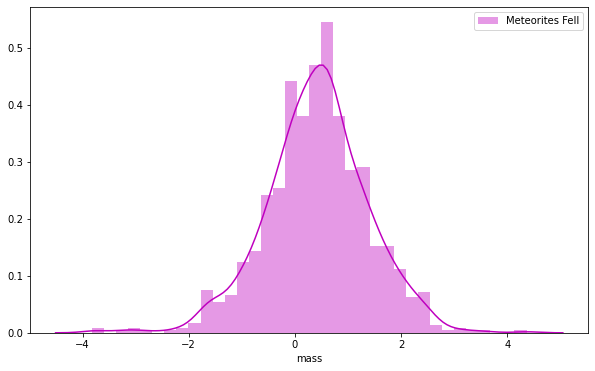

In [52]:
import numpy as np
plt.figure(figsize=(10,6))
sns.distplot(np.log10(df.mass),color='m')
plt.legend(['Meteorites Fell']);

### Size of meteorites based on year found

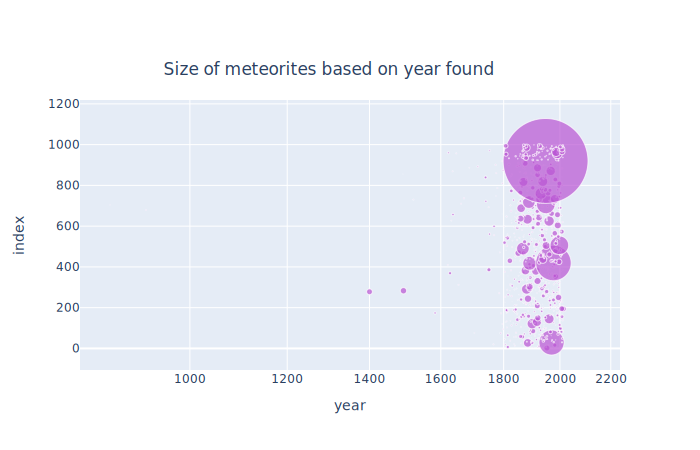

In [53]:
fig = px.scatter(df, x="year", size="mass", color_discrete_sequence=['mediumorchid'],
                 title='Size of meteorites based on year found',
                 hover_name="name", log_x=True, size_max=60)


fig.update_layout(
    title={
        'text': "Size of meteorites based on year found",
        'y':0.86,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

### Number of meteorites based on size category

In [54]:
df.mass.describe(percentiles=[.15,.25,.50,.75,.90,.95,.99,.999])

count      985.000000
mean        49.576100
std        749.007341
min          0.000150
15%          0.330480
25%          0.705000
50%          2.800000
75%         10.000000
90%         41.892000
95%        100.000000
99%        330.000000
99.9%     4304.000000
max      23000.000000
Name: mass, dtype: float64

In [55]:
df['mass_cat'] = '< 0.30'
df.loc[(df['mass'] >= 0.30) & (df['mass'] < 0.70), 'mass_cat'] = '0.30-0.70'
df.loc[(df['mass'] >= 0.70) & (df['mass'] < 2.80), 'mass_cat'] = '0.70-2.80'
df.loc[(df['mass'] >= 2.80) & (df['mass'] < 10.0), 'mass_cat'] = '2.80-10.00'
df.loc[(df['mass'] >= 10.0) & (df['mass'] < 42.0), 'mass_cat'] = '10.00-42.00'
df.loc[(df['mass'] >= 42.0) & (df['mass'] < 100.0), 'mass_cat'] = '42.00-100.00'
df.loc[(df['mass'] >= 100.0) & (df['mass'] < 330.0), 'mass_cat'] = '100.00-330.00'
df.loc[(df['mass'] >= 330.0), 'mass_cat'] = '> 330.00'

In [56]:
df['mass_cat'].value_counts()

0.70-2.80        251
2.80-10.00       244
10.00-42.00      151
< 0.30           139
0.30-0.70        101
42.00-100.00      45
100.00-330.00     43
> 330.00          11
Name: mass_cat, dtype: int64

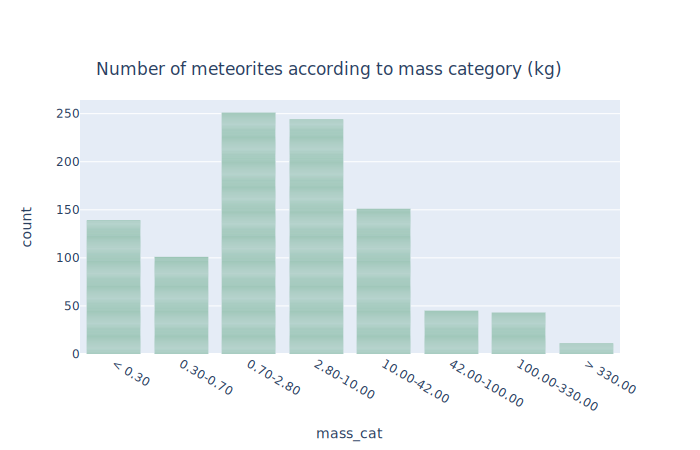

In [57]:
fig = px.bar(df, x='mass_cat', title='Number of meteorites according to mass category (kg)',
            color_discrete_sequence=['seagreen'], hover_name='name')

fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['< 0.30', '0.30-0.70', '0.70-2.80',
                '2.80-10.00', '10.00-42.00', '42.00-100.00', '100.00-330.00']},
            title={
        'text': "Number of meteorites according to mass category (kg)",
        'y':0.86,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

## Meteorites on maps

### Heatmap of all impacts

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



Text(0.5, 1.0, 'Heatmap of all meteorite impacts')

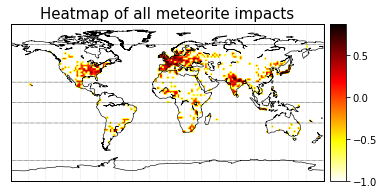

In [58]:
h = plt.hist2d(df.reclong,df.reclat,bins=(np.arange(-180,182,2),np.arange(-90,92,2)))
X,Y = np.meshgrid(h[1][:-1]+1.0,h[2][:-1]+1.0)

map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6)

data_interp, x, y = map.transform_scalar(np.log10(h[0].T+0.1), X[0], Y[:,0], 360, 360, returnxy=True)
map.pcolormesh(x, y, data_interp,cmap='hot_r')
map.colorbar()
plt.title('Heatmap of all meteorite impacts', fontsize=15)
#plt.figure(figsize=(80,40))


### Mapping selected areas

In [59]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,mass_cat
0,Aachen,1,Valid,L5,0.021,Fell,1880,50.77500,6.08333,< 0.30
1,Aarhus,2,Valid,H6,0.720,Fell,1951,56.18333,10.23333,0.70-2.80
2,Abee,6,Valid,EH4,107.000,Fell,1952,54.21667,-113.00000,100.00-330.00
3,Acapulco,10,Valid,Acapulcoite,1.914,Fell,1976,16.88333,-99.90000,0.70-2.80
4,Achiras,370,Valid,L6,0.780,Fell,1902,-33.16667,-64.95000,0.70-2.80


In [60]:
lat_long = df[['reclat','reclong']]
lat_long.head()

,reclat,reclong
0,50.77500,6.08333
1,56.18333,10.23333
2,54.21667,-113.00000
3,16.88333,-99.90000
4,-33.16667,-64.95000


#### With negative latitude and longitude

In [61]:
neg_le_long = lat_long.loc[(lat_long['reclat']<0) & (lat_long['reclong']<0)]
neg_le_long.head()

,reclat,reclong
4,-33.16667,-64.95000
8,-31.60000,-65.23333
9,-30.86667,-64.55000
39,-22.96667,-44.31667
45,-33.00000,-66.00000


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



Text(0.5, 1.0, 'Heatmap of meteorite impacts (negative lon/lat)')

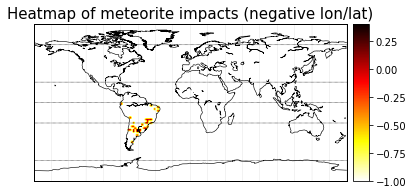

In [62]:
h = plt.hist2d(neg_le_long.reclong,neg_le_long.reclat,bins=(np.arange(-180,182,2),np.arange(-90,92,2)))
X,Y = np.meshgrid(h[1][:-1]+1.0,h[2][:-1]+1.0)

map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6)

data_interp, x, y = map.transform_scalar(np.log10(h[0].T+0.1), X[0], Y[:,0], 360, 360, returnxy=True)
map.pcolormesh(x, y, data_interp,cmap='hot_r')
map.colorbar()
plt.title('Heatmap of meteorite impacts (negative lon/lat)', fontsize=15)


#### With positive latitude and longitude

In [63]:
pos_le_long = lat_long.loc[(lat_long['reclat']>0) & (lat_long['reclong']>0)]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



Text(0.5, 1.0, 'Heatmap of meteorite impacts (positive lon/lat)')

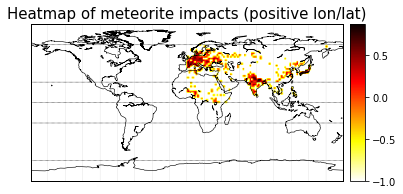

In [64]:
h = plt.hist2d(pos_le_long.reclong,pos_le_long.reclat,bins=(np.arange(-180,182,2),np.arange(-90,92,2)))
X,Y = np.meshgrid(h[1][:-1]+1.0,h[2][:-1]+1.0)

map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6)

data_interp, x, y = map.transform_scalar(np.log10(h[0].T+0.1), X[0], Y[:,0], 360, 360, returnxy=True)
map.pcolormesh(x, y, data_interp,cmap='hot_r')
map.colorbar()
plt.title('Heatmap of meteorite impacts (positive lon/lat)', fontsize=15)

### Density maps

#### Density map based on location and year

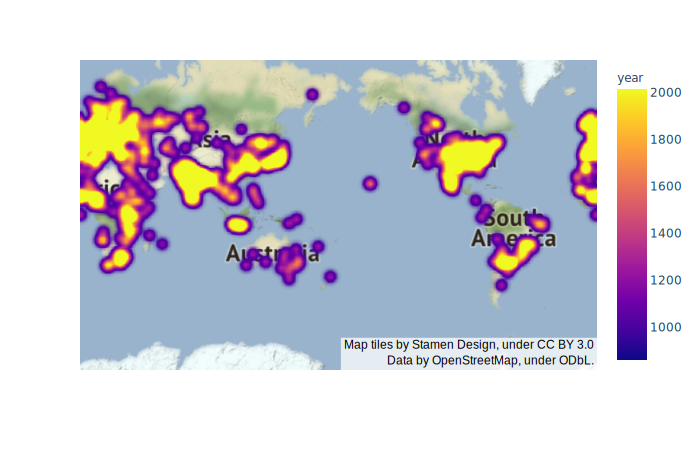

In [65]:
fig = px.density_mapbox(df, lat='reclat', lon='reclong',z ='year',hover_name='name',radius=10,
                        center=dict(lat=0, lon=180), zoom=0.01,
                        mapbox_style="stamen-terrain")
fig.show()

#### Density map of impacts in South America

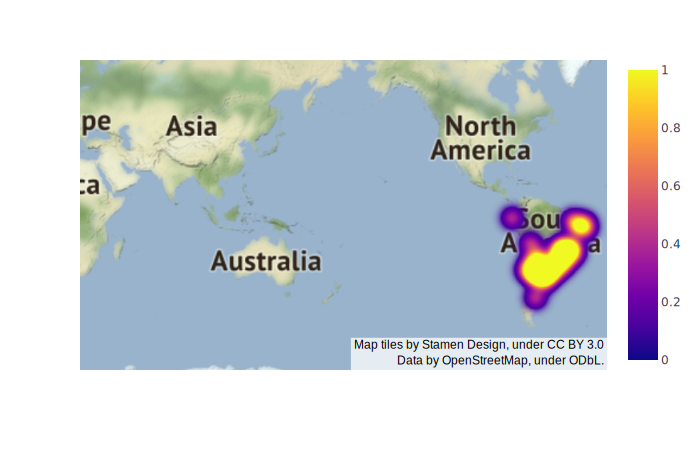

In [66]:
fig = px.density_mapbox(neg_le_long, lat='reclat', lon='reclong',radius=20, 
                        center=dict(lat=0, lon=180), zoom=0.25,
                        mapbox_style="stamen-terrain")
fig.show()

#### Density map of impacts with positive latitude and longitude

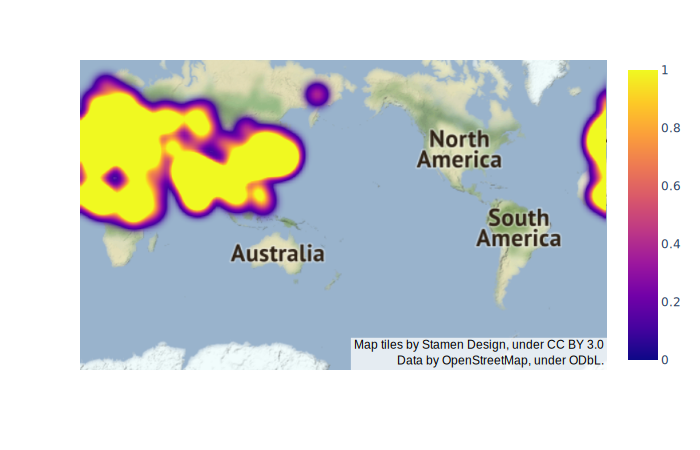

In [67]:
fig = px.density_mapbox(pos_le_long, lat='reclat', lon='reclong',radius=20,
                        center=dict(lat=0, lon=180), zoom=0.01,
                        mapbox_style="stamen-terrain")
fig.show()

### Scatter maps

#### Scatter map of all impacts

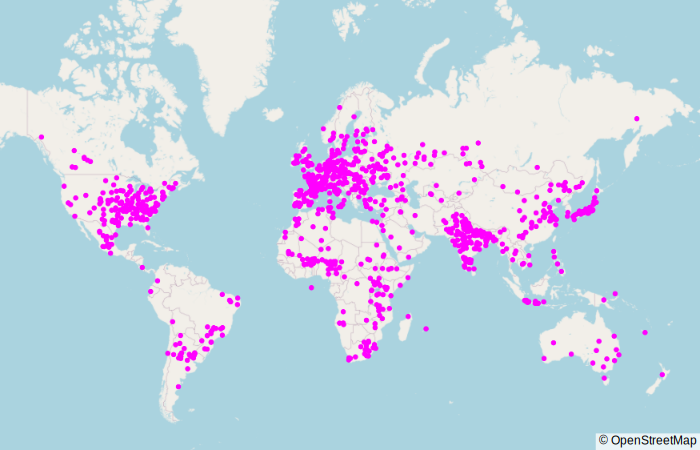

In [68]:
fig = px.scatter_mapbox(df, lat="reclat", lon="reclong", hover_name="name", 
                        color_discrete_sequence=["fuchsia"], zoom=0.5, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Scatter map of impacts in South America

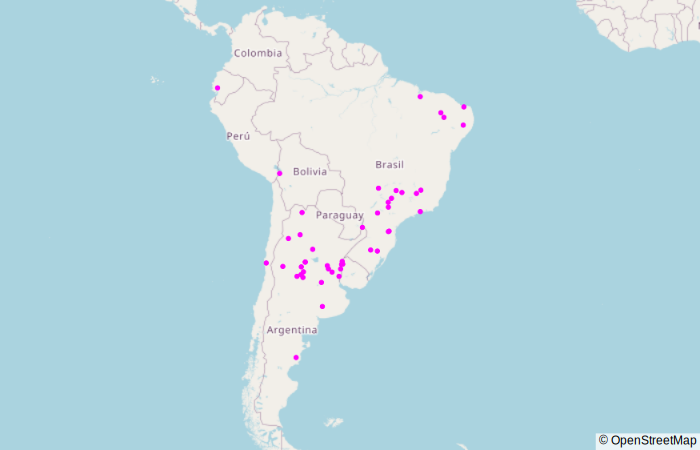

In [69]:
fig = px.scatter_mapbox(neg_le_long, lat="reclat", lon="reclong", 
                        color_discrete_sequence=["fuchsia"], zoom=2, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Scatter map of impacts with positive latitude and longitude

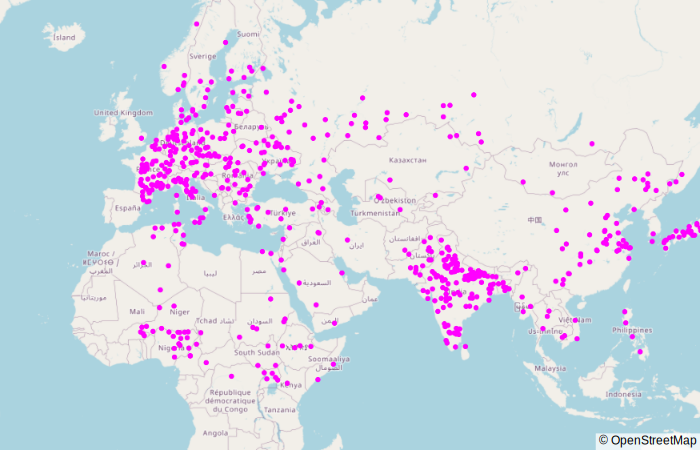

In [70]:
fig = px.scatter_mapbox(pos_le_long, lat="reclat", lon="reclong", 
                        color_discrete_sequence=["fuchsia"], zoom=1.5, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Scatter maps based on years

In [71]:
df1 = df.sort_values('year')
df1.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,mass_cat
704,Nogata,16988,Valid,L6,0.4720,Fell,861,33.72500,130.75000,0.30-0.70
679,Narni,16914,Valid,Stone-uncl,2.1575,Fell,921,42.51667,12.51667,0.70-2.80
278,Elbogen,7823,Valid,"Iron, IID",107.0000,Fell,1400,50.18333,12.73333,100.00-330.00
856,Rivolta de Bassi,22614,Valid,Stone-uncl,0.1033,Fell,1491,45.48333,9.51667,< 0.30
283,Ensisheim,10039,Valid,LL6,127.0000,Fell,1492,47.86667,7.35000,100.00-330.00


##### Scatter map of the first meteorite

In [72]:
first_metroid = df1.loc[df['year']==861]
first_metroid

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,mass_cat
704,Nogata,16988,Valid,L6,0.472,Fell,861,33.725,130.75,0.30-0.70


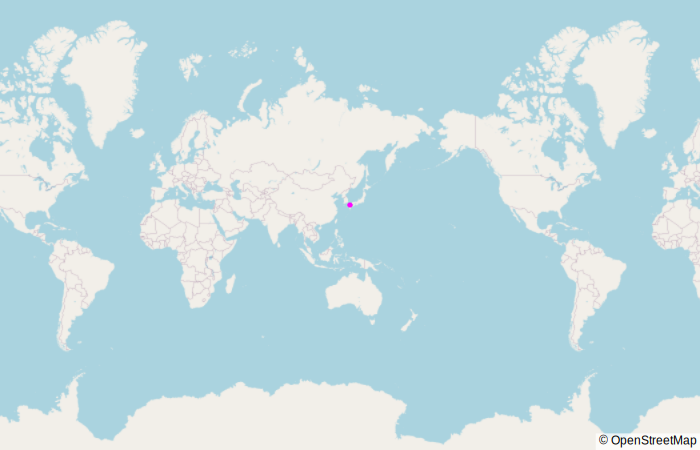

In [73]:
fig = px.scatter_mapbox(first_metroid, lat="reclat", lon="reclong",hover_name='name', 
                        color_discrete_sequence=["fuchsia"], zoom=0, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

##### Scatter map of the last meteorite in dataset

In [74]:
latest_metroids = df1.loc[df['year']==2013]
latest_metroids

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,mass_cat
194,Chelyabinsk,57165,Valid,LL5,100.0,Fell,2013,54.81667,61.11667,100.00-330.00


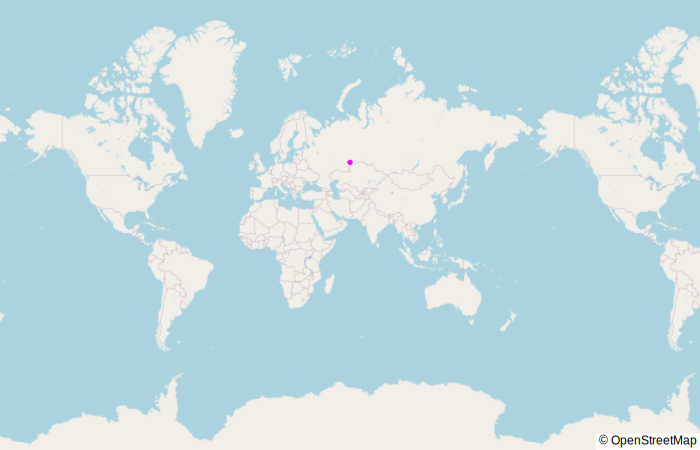

In [75]:
fig = px.scatter_mapbox(latest_metroids, lat="reclat", lon="reclong",hover_name='name', 
                        color_discrete_sequence=["fuchsia"], zoom=0, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

##### Scatter map of the meteorites in the year with most meteorites

In [76]:
df['year'].value_counts()

1933    16
1949    12
1868    11
1930    11
1976    10
        ..
1791     1
1790     1
1787     1
1785     1
921      1
Name: year, Length: 246, dtype: int64

In [77]:
max_metroid_year = df1.loc[df['year']==1933]

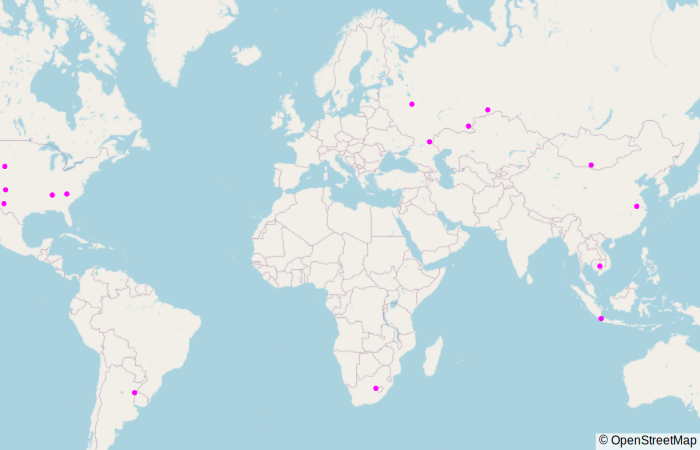

In [78]:
fig = px.scatter_mapbox(max_metroid_year, lat="reclat", lon="reclong",hover_name='name', 
                        color_discrete_sequence=["fuchsia"], zoom=1, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

##### Largest meteorite

In [79]:
larget_metroid =df.loc[df['mass']==df['mass'].max()]

In [80]:
larget_metroid

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,mass_cat
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000.0,Fell,1947,46.16,134.65333,> 330.00


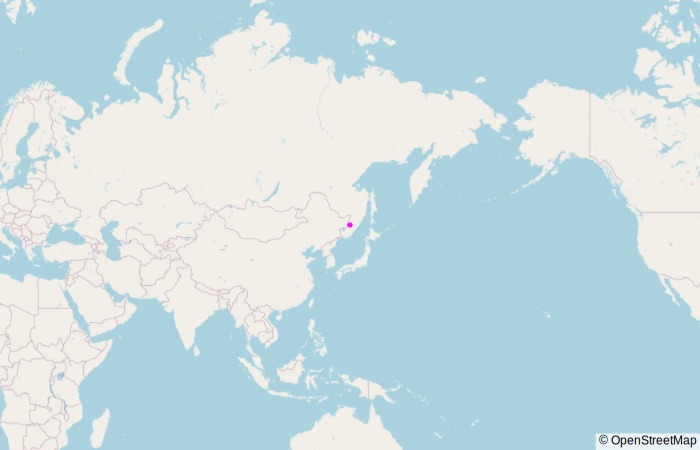

In [81]:
fig = px.scatter_mapbox(larget_metroid, lat="reclat", lon="reclong",hover_name='name', 
                        color_discrete_sequence=["fuchsia"], zoom=1, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

##### Smallest Meteorite

In [82]:
smallest_metroid =df.loc[df['mass']==df['mass'].min()]

In [83]:
smallest_metroid

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,mass_cat
922,Silistra,55584,Valid,Achondrite-ung,0.00015,Fell,1917,44.11667,27.26667,< 0.30


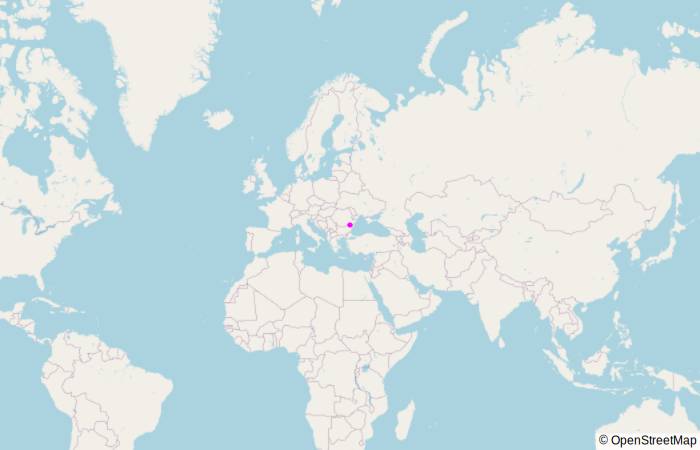

In [84]:
fig = px.scatter_mapbox(smallest_metroid, lat="reclat", lon="reclong",hover_name='name', 
                        color_discrete_sequence=["fuchsia"], zoom=1, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()